In [ ]:
#### Defining Problem Statement and Analysing basic metrics
# The large data set needs to be processed and sanitised to bring out insights like:
# analysis of Types of Shows on netflix, Which is best time to release content, which genres are trending and which on needs to work on.
# Analysing the Data Set about the movies available on Netflix and providing the data-backed based insights and recommendations.
# The recommendations will be to improve business, identifying any flaws, recommendations to improve subscriber base and how to provide more personalised content for the user.
# The analysis will be based on the metric both categorical and numerical.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O 'netflix_titles.csv'

In [ ]:
df = pd.read_csv('netflix_titles.csv')

# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary
df.info()
df.shape
df.describe(include = object)

# The Raw data has 8807 records and 8 attributes. All attributes are object type except release year.
# date_added need to be converted to datetime type for further processing.
# director,cast,country,listed_in are all nested data that will be processed to unnest it for further processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
df.isna().sum()
#missing values detection
#there are 2634 directors data not added
#there are 825 cast data not added - This might happed for some records for documentaries
#there are 831 country record as null

# I'll be filling the nulls of country, director, cast with 'unknown'
# I'll go ahead with filling cast and director with the most famous cast-director pair based on maximum movies they are casted in but i'm choosing unknown as my analysis won't be impacted much by this multi value imputation.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Pre Processing of Raw Data
def convertNan(x): #Filling the missing values
  if x=='nan':
    x='Unknown'
    return x
  return x
constraint = df['cast'].apply(lambda x: str(x).split(',')).tolist()
df_cast=pd.DataFrame(constraint,index=df['title'])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast=df_cast[['title',0]]
df_cast.columns=['title','cast']
df_cast['cast']=df_cast['cast'].apply(convertNan)

In [ ]:
d_cons = df['director'].apply(lambda x: str(x).split(',')).tolist()
df_director=pd.DataFrame(d_cons,index=df['title'])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']
df_director['director']=df_director['director'].apply(convertNan)

In [ ]:
country_cons = df['country'].apply(lambda x: str(x).split(',')).tolist()
df_country=pd.DataFrame(country_cons,index=df['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']
df_country['country']=df_country['country'].apply(convertNan)

In [ ]:
genre_cons = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
df_genre=pd.DataFrame(genre_cons,index=df['title'])
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre=df_genre[['title',0]]
df_genre.columns=['title','genre']
df_genre['genre']=df_genre['genre'].apply(convertNan)

In [ ]:
#Merging the de listed tables
df_cast_director = df_cast.merge(df_director,how='inner',on='title')
df_cast_director_country = df_cast_director.merge(df_country,how='inner',on='title')
df_deindexed = df_cast_director_country.merge(df_genre,how='inner',on='title')
df_final = df.merge(df_deindexed,how='inner',on='title')
df_final.drop(['director_x','cast_x','country_x','listed_in'],axis=1,inplace=True)
df_final.rename({'cast_y':'cast','director_y':'director','country_y':'country'},axis=1,inplace=True)

#filling the rating null values with mode of whole column.
df_final['rating'] = pd.Series(df_final['rating'].fillna(df_final['rating'].mode()))

In [ ]:
## Processed Table analysis for value_counts and unique values:
df_final['release_year'].min(),df_final['release_year'].max() #records contains the movies released from 1925 - 2021
df_final['type'].value_counts() # type is a categorical attribute with 2 values
df_final['country'].value_counts() # This attribute contains the 198 unique records where the content is released
df_final['rating'].value_counts()# All the possible ratings available for this data set
df_final['duration'].value_counts() # Runtime for various movies and TV shows

## Most of the attributes are categorical and will be analysed further for insights


1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
#Conversion of Column Date_added to Date type for futher analysis
df_final["date_added"] = pd.to_datetime(df_final["date_added"])

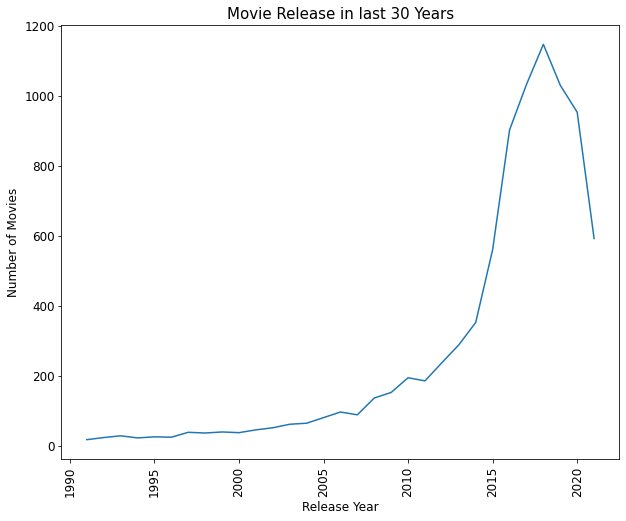

In [ ]:
#Trend of movies released in last 30 year
no_of_movies = df_final.groupby('release_year')['title'].nunique().reset_index()
TotalMoviesReleased = no_of_movies.sort_values("release_year",ascending=False)[:31]
plt.figure(figsize=(10,8))
sns.lineplot(x='release_year', y='title', data=TotalMoviesReleased)
plt.title('Movie Release in last 30 Years',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Number of Movies',fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# the trend of number of movie relased has been increasing as we call see from the line plot with maximum movie releases peaking in year 2017,2018,2019

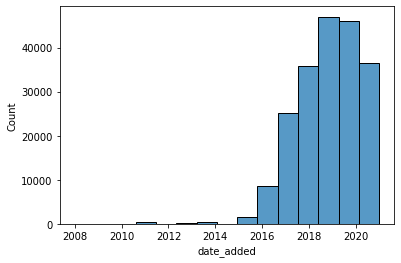

In [ ]:
sns.histplot(df_final["date_added"].dt.year, bins=15) #The movies added to Netflix
plt.show()

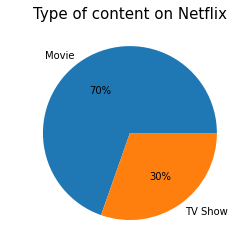

In [ ]:
#Types of content on Netflix
ShowType = df_final.groupby('type')['title'].nunique()
plt.title('Type of content on Netflix',fontsize=15)
ShowType.plot(kind='pie',label = " ",autopct='%.0f%%')
plt.show()

In [ ]:
df_typeofshowsCW = df_final.groupby(["country","type"])['title'].nunique().reset_index().sort_values("title",ascending=False)
df_typeofshowsCW[df_typeofshowsCW["type"]=='TV Show'][:11] #Not many TV shows are released in India,Canada,Japan, South Korea as compared to US

,country,type,title
282,United States,TV Show,847
284,Unknown,TV Show,391
280,United Kingdom,TV Show,246
213,Japan,TV Show,174
261,South Korea,TV Show,164
146,United States,TV Show,91
169,Canada,TV Show,84
201,India,TV Show,81
271,Taiwan,TV Show,70
188,France,TV Show,64


In [ ]:
Major_release = df_final.groupby('country')['title'].nunique().reset_index().sort_values("title",ascending=False)[:11]
# Major Releases in countries are US, India, UK, Canada

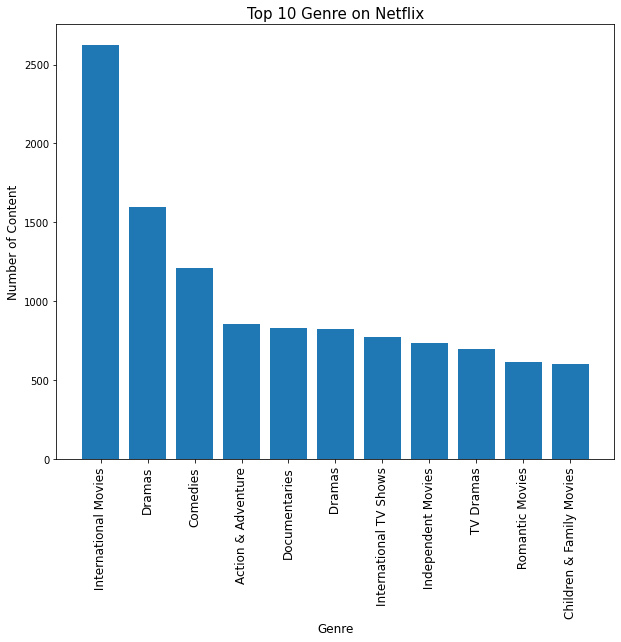

In [ ]:
#Top 10 genre available on netflix
Genre_analysis =df_final.groupby('genre')['title'].nunique().reset_index().sort_values("title",ascending=False)[:11]
plt.figure(figsize=(10,8))
plt.title('Top 10 Genre on Netflix',fontsize=15)
y_bar = Genre_analysis['genre']
x_bar = Genre_analysis['title']
plt.bar(y_bar,x_bar)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Number of Content',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

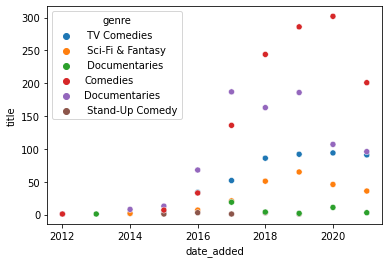

In [ ]:
dfpair=df_final.groupby([df_final["date_added"].dt.year,'genre'])["title"].nunique().reset_index().sort_values("date_added",ascending=False)
dfpairnew = dfpair[dfpair['genre'].isin(['Comedies','Documentaries',' TV Comedies',' Documentaries',' Stand-Up Comedy',' Sci-Fi & Fantasy'])]
sns.scatterplot(x= 'date_added', y= 'title', data = dfpairnew,hue='genre')
plt.show() #comedies and documentaries are being added by netflix at high rate

In [ ]:
df_genreA = df_final.groupby(["country","genre"])['title'].nunique().reset_index().sort_values("title",ascending=False)
df_genreA[df_genreA["country"]=='India']
df_genreA[df_genreA["country"]=='United States']
#india is emerging market and Comedy is in top 5 Genre , but documentaries (which is in top 10 genre released on netflix) is not in top 10 ---- > scope for improvement
df_genreA[df_genreA["genre"]=='Documentaries']
#US and UK are major Documentaries Consumers
df_genreA[df_genreA["genre"]=='Comedies'] # Major releases of Comedies is in US and India region ---> Scope for improvement UK,Canada,Japan

,country,genre,title
2386,United States,Comedies,374
1570,India,Comedies,267
2453,Unknown,Comedies,62
2258,Turkey,Comedies,52
1392,Egypt,Comedies,51
...,...,...,...
729,Portugal,Comedies,1
766,Saudi Arabia,Comedies,1
1044,Uruguay,Comedies,1
903,Syria,Comedies,1


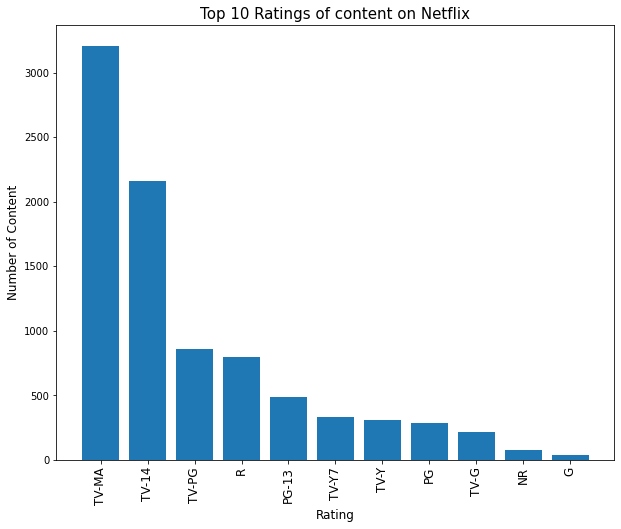

In [ ]:
rating_analysis =df_final.groupby('rating')['title'].nunique().reset_index().sort_values("title",ascending=False)[:11]
plt.figure(figsize=(10,8))
plt.title('Top 10 Ratings of content on Netflix',fontsize=15)
y_bar = rating_analysis['rating']
x_bar = rating_analysis['title']
plt.bar(y_bar,x_bar)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Number of Content',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()


In [ ]:
df_content = df_final.groupby(["country","rating"])['title'].nunique().reset_index().sort_values("title",ascending=False)[:20]
df_content[df_content["country"]=='India']
#Although R rated content is top 5, In India it's least released
df_content[df_content["rating"]=='TV-MA'] # TV-MA content can be released more in rest of major regions like India,UK,Canada

,country,rating,title
755,United States,TV-MA,986
766,Unknown,TV-MA,276
542,India,TV-MA,260
739,United Kingdom,TV-MA,225
698,Spain,TV-MA,143
385,United States,TV-MA,115
502,France,TV-MA,114


In [ ]:
# Most content for region India is added in month of March, April, October,December and least in Feb and June
df_india = df_final.groupby(["country",df_final["date_added"].dt.month_name()])['title'].nunique().reset_index().sort_values("title",ascending=False)
df_india[df_india["country"]=='India']
df_final.groupby([df_final["date_added"].dt.month_name()])['title'].nunique().reset_index().sort_values("title",ascending=True)

#least content addition throughout the demography is in Feb,May
df_india[df_india["country"]=='United States']
## Most content for region United States is added in month of Jan, Nov and least in month of May

df_final.groupby(["country"])['title'].nunique().reset_index().sort_values("title",ascending=False)[:11]
#Maxium number of movies are released in US,India,UK ----> Canada, Japan,France, South Korea are Potential markets

,country,title
191,United States,3211
141,India,1008
192,Unknown,831
190,United Kingdom,628
106,United States,479
122,Canada,271
148,Japan,259
132,France,212
179,South Korea,211
181,Spain,181


In [ ]:
df_final.groupby('cast')["title"].nunique().reset_index().sort_values("title",ascending=False)[1:11] # top 10 casts with content on netflix are Indian ---> World market is accepting indian based movies


,cast,title
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
4186,Boman Irani,25
23956,Paresh Rawal,25
33367,Yuki Kaji,25


In [ ]:
# Insights:Insights:
# After Processing and sanitizing the dataset of Netflix, below are my insights:
#   -The analysis is based majorly on categorical variables as there are not many continuous variables available.
#   -The movies released and being added continuosly increased till 2019 and there was drop in 2020 and 2021, that may have been because of pandemic.
#   -70% of content type is type movies and 30% is TV Series. This does not necessarily means TV series is less. There may be many seasons and episodes but in absoulte count Movies are way more.
#   -Most TV shows are released in US (more than 3 times of any country)
#   -Based on releases across different geographic regions (US,India,UK,Canada) turns out to be major market.
#   -Top 5 genres on Netflix - International movies, Dramas, Comidies, Action and Adventure, Documentaries. Based on trend, rate of comedies and documentaries genre addition is high.
#   -Even after being in top 5 Genre, not many Documentaries are released in India (Documentaries are not even in top 10 genre of content in INDIA)
#   -On similiar lines, Comedies genre is trending on netflix, it is still not released much in major markets like UK,CANADA,JAPAN.
#   -R rated content is also on top 5 on NETFLIX, but it's not much available in India.
#   -TV-MA(Mature content) is majorly released in US(it is 4 times more than any other county)
#   -Most content added to netfilx - Feb, May
#   -For India most content added - March,April,October,December
#   -For US - Jan, Nov
#   -Movies with Indian Cast is added more accross multple geograpic regions.
#   -Many Cast,directors and country columns are null for documentaries.



In [ ]:
#Recommendations:
#  -Netflix might find a way to add content which is protected from lockdown and pandemic restrictions like podcasts, and high-quality animation and expand in direction of meta-verse film production.
#  -Netflix can make TV shows available in regions like India, UK which are big markets to increase the subscriber base and give more personalised content to users.
#  -Content of genre documentaries can be released in India too, to boost up the documentary genre of NETFLIX. Netflix might find a bigger target audience in India for documentaries.
#  -Similarly Comedy genre content should be released for UK, Canada,Japan. Even Netflix can push for regional comedy content for different regions as Comedy content is gaining traction over past few years.
#  -TV-MA rating content should be made availabe to bigger markets like UK, India,Canada,Japan.
#  -R rated can be expanded to India.
#  -Most content of any genre and rating is released in US, India,UK. There is need to release them in Canada, Japan, France, South Korea as well.
#  -Feb and June are the months when least content is added for India Region. Netflix can push for intresting india specific content in these months.
#  -Similary lean content month for US is May, Netflix can push for good quality content that time.
